# Custom Performance Metrics Implementation

In the following notebook, we will develop code to create custom metrics equivalent to the confusion matrix, F1 score, area under the curve, accuracy score, mean square error, MAPE, and R-squared error. This will help us gain a deeper understanding of these metrics, following a similar approach to how scikit-learn implements them using the sklearn.metrics module. We will apply these custom metrics to four self-generated binary-classification datasets.

For detailed definitions, data specifics, and a comprehensive explanation of the code activities, please refer to the README document located in the same folder.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd

#### Working with dataset df_a to generate confusion matrix, F1 score, Accuracy score, Area under the curve and ROC curve

In [6]:
%cd --

/Users/rathish/Documents/Data_Science_Projects/Custom_Performance_Metrics/notebooks


In [16]:
# Importing data:
local = '/Users/rathish/Documents/Data_Science_Projects/Custom_Performance_Metrics/data/'
df_a=pd.read_csv(local+'a.csv')
df_a.head

<bound method NDFrame.head of          y     proba
0      1.0  0.637387
1      1.0  0.635165
2      1.0  0.766586
3      1.0  0.724564
4      1.0  0.889199
...    ...       ...
10095  1.0  0.665371
10096  1.0  0.607961
10097  1.0  0.777724
10098  1.0  0.846036
10099  1.0  0.679507

[10100 rows x 2 columns]>

In [8]:

# 1.  Computing Confusion Matrix
## Defining new column y_pred based on condition 𝑦𝑝𝑟𝑒𝑑=[0 if y_score < 0.5 else 1]

df_a['y_pred'] = np.where(df_a['proba'] < 0.5, 0, 1)

## Defining FP, TP, FN, TN
def perfmeasure(df):
    if ((df['y'] == 1) & (df['y_pred'] == 1)):
        return "TP"
    elif ((df['y'] == 0) & (df['y_pred'] == 0)):
        return "TN"
    elif ((df['y'] == 1) & (df['y_pred'] == 0)):
        return "FN"
    elif ((df['y'] == 0) & (df['y_pred'] == 1)):
        return "FP"
    else: 
        False
df_a['perfmeasure'] = df_a.apply(perfmeasure, axis = 1)

# Defining TN_count, FN_count, TP_count, FP_count
TN_ = np.count_nonzero(df_a['perfmeasure'] == 'TN')
FN_ = np.count_nonzero(df_a['perfmeasure'] == 'FN')
FP_ = np.count_nonzero(df_a['perfmeasure'] == 'FP')
TP_ = np.count_nonzero(df_a['perfmeasure'] == 'TP')

# Confusion matrix
confusionmatrix = np.array([TN_, FN_, FP_, TP_]).reshape(2,2)

# Defining precision and recall
precision = 0 if (TP_ + FP_) == 0 else TP_/(TP_ + FP_)
recall = 0 if (TP_ + FN_) == 0 else TP_/(TP_ + FN_)

# Defining F1 score:
F1_score = 2*precision*recall/(precision + recall)

# Defining Accuracy score:
Accuracy_score = (TN_ + TP_)/(TN_ + FN_ + FP_ + TP_)

# Printing solutions: 
print("1. Confusion matrix = \n {}".format(confusionmatrix))
print("\n2. F1 score = {}".format(F1_score))
print("\n4. Accuracy score = {}".format(Accuracy_score))

1. Confusion matrix = 
 [[    0     0]
 [  100 10000]]

2. F1 score = 0.9950248756218906

4. Accuracy score = 0.9900990099009901


In [9]:
# Area Under the Curve
## Sorting data values according to probability score

df_a.sort_values(by = ['proba'], ascending = False, inplace = True)

tpr_lista, fpr_lista = [], []

for prob in df_a['proba']:
    df_a['y_tau'] = np.where(df_a['proba'] < prob, 0, 1)

    ## Defining FP, TP, FN, TN
    def perfmeasure(df):
        if ((df['y'] == 1) & (df['y_tau'] == 1)):
            return "TP"
        elif ((df['y'] == 0) & (df['y_tau'] == 0)):
            return "TN"
        elif ((df['y'] == 1) & (df['y_tau'] == 0)):
            return "FN"
        elif ((df['y'] == 0) & (df['y_tau'] == 1)):
            return "FP"
        else: 
            False
    df_a['perfmeasuretau'] = df_a.apply(perfmeasure, axis = 1)
    
    # Defining TN_count, FN_count, TP_count, FP_count
    TN_ = np.count_nonzero(df_a['perfmeasuretau'] == 'TN')
    FN_ = np.count_nonzero(df_a['perfmeasuretau'] == 'FN')
    FP_ = np.count_nonzero(df_a['perfmeasuretau'] == 'FP')
    TP_ = np.count_nonzero(df_a['perfmeasuretau'] == 'TP')
    
    # Defining TPR and FPR
    TPR = 0 if (TP_ + FN_) == 0 else TP_/(TP_ + FN_)
    FPR = 0 if (TN_ + FP_) == 0 else FP_/(TN_ + FP_)
    
    # Appending TPR and FPR to corresponding empty lists
    tpr_lista.append(TPR)
    fpr_lista.append(FPR)
    
# Converting tpr_list and fpr_list into arrays:
tpr_arraya = np.array(tpr_lista)
fpr_arraya = np.array(fpr_lista)



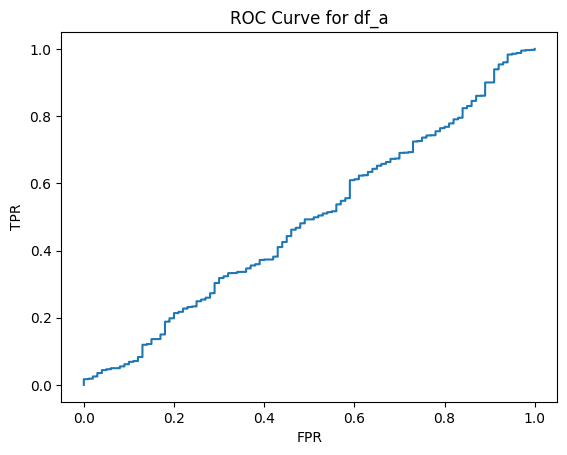


 3. Area under the curve/pAUC = 0.48829900000000004


In [11]:
# 3a plotting the ROC curve
import matplotlib.pyplot as plt

plt.plot( fpr_lista, tpr_lista)
plt.title("ROC Curve for df_a")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# 3b Calculating and printing pAUC or area under the curve using np.trapz
pAUC = np.trapz(tpr_arraya, fpr_arraya)
print("\n 3. Area under the curve/pAUC = {}".format(pAUC))

#### Working with dataset df_b to generate confusion matrix, F1 score, Accuracy score, Area under the curve and ROC curve

In [17]:
df_b=pd.read_csv(local+'b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [18]:
# 1.  Computing Confusion Matrix
## Defining new column y_pred based on condition 𝑦𝑝𝑟𝑒𝑑=[0 if y_score < 0.5 else 1]

df_b['y_pred'] = np.where(df_b['proba'] < 0.5, 0, 1)

## Defining FP, TP, FN, TN
def perfmeasure(df):
    if ((df['y'] == 1) & (df['y_pred'] == 1)):
        return "TP"
    elif ((df['y'] == 0) & (df['y_pred'] == 0)):
        return "TN"
    elif ((df['y'] == 1) & (df['y_pred'] == 0)):
        return "FN"
    elif ((df['y'] == 0) & (df['y_pred'] == 1)):
        return "FP"
    else: 
        False
df_b['perfmeasure'] = df_b.apply(perfmeasure, axis = 1)

# Defining TN_count, FN_count, TP_count, FP_count
TN_ = np.count_nonzero(df_b['perfmeasure'] == 'TN')
FN_ = np.count_nonzero(df_b['perfmeasure'] == 'FN')
FP_ = np.count_nonzero(df_b['perfmeasure'] == 'FP')
TP_ = np.count_nonzero(df_b['perfmeasure'] == 'TP')

# Confusion matrix
confusionmatrix = np.array([TN_, FN_, FP_, TP_]).reshape(2,2)

# Defining precision and recall
precision = 0 if (TP_ + FP_) == 0 else TP_/(TP_ + FP_)
recall = 0 if (TP_ + FN_) == 0 else TP_/(TP_ + FN_)

# Defining F1 score:
F1_score = 2*precision*recall/(precision + recall)

# Defining Accuracy score:
Accuracy_score = (TN_ + TP_)/(TN_ + FN_ + FP_ + TP_)

# Printing solutions: 
print("1. Confusion matrix = \n {}".format(confusionmatrix))
print("\n2. F1 score = {}".format(F1_score))
print("\n4. Accuracy score = {}".format(Accuracy_score))

1. Confusion matrix = 
 [[9761   45]
 [ 239   55]]

2. F1 score = 0.2791878172588833

4. Accuracy score = 0.9718811881188119


In [19]:
# Area Under the Curve
## Sorting data values according to probability score

df_b.sort_values(by = ['proba'], ascending = False, inplace = True)

tpr_listb, fpr_listb = [], []

for prob in df_b['proba']:
    df_b['y_tau'] = np.where(df_b['proba'] < prob, 0, 1)

    ## Defining FP, TP, FN, TN
    def perfmeasure(df):
        if ((df['y'] == 1) & (df['y_tau'] == 1)):
            return "TP"
        elif ((df['y'] == 0) & (df['y_tau'] == 0)):
            return "TN"
        elif ((df['y'] == 1) & (df['y_tau'] == 0)):
            return "FN"
        elif ((df['y'] == 0) & (df['y_tau'] == 1)):
            return "FP"
        else: 
            False
    df_b['perfmeasuretau'] = df_b.apply(perfmeasure, axis = 1)
    
    # Defining TN_count, FN_count, TP_count, FP_count
    TN_ = np.count_nonzero(df_b['perfmeasuretau'] == 'TN')
    FN_ = np.count_nonzero(df_b['perfmeasuretau'] == 'FN')
    FP_ = np.count_nonzero(df_b['perfmeasuretau'] == 'FP')
    TP_ = np.count_nonzero(df_b['perfmeasuretau'] == 'TP')

    
    # Defining TPR and FPR
    TPR = 0 if (TP_ + FN_) == 0 else TP_/(TP_ + FN_)
    FPR = 0 if (TN_ + FP_) == 0 else FP_/(TN_ + FP_)
    
    # Appending TPR and FPR to corresponding empty lists
    tpr_listb.append(TPR)
    fpr_listb.append(FPR)
    
# Converting tpr_list and fpr_list into arrays:
tpr_arrayb = np.array(tpr_listb)
fpr_arrayb = np.array(fpr_listb)

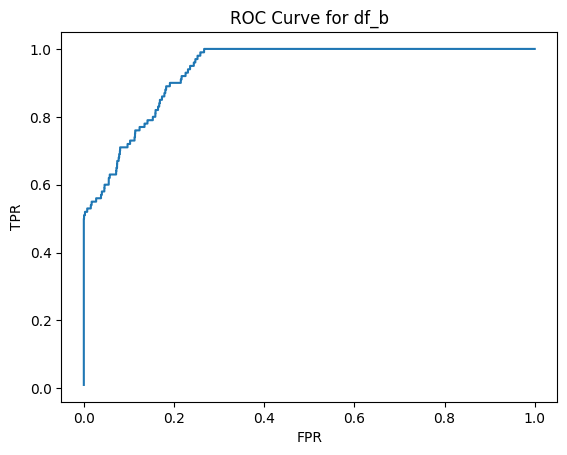


 3. Area under the curve/pAUC = 0.9377570000000001


In [20]:
# 3a plotting the ROC curve
import matplotlib.pyplot as plt

plt.plot( fpr_listb, tpr_listb,)
plt.title("ROC Curve for df_b")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# 3b Calculating and printing pAUC or area under the curve using np.trapz
pAUC = np.trapz(tpr_arrayb, fpr_arrayb)
print("\n 3. Area under the curve/pAUC = {}".format(pAUC))

#### Working with dataset df_c 

In [24]:
df_c=pd.read_csv(local + 'c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [25]:
# Area Under the Curve
## Sorting data values according to probability score

df_c.sort_values(by = ['prob'], ascending = False, inplace = True)

A_vallist, Tau_list = [], []

for prb in df_c['prob']:
    df_c['y_tau'] = np.where(df_c['prob'] < prb, 0, 1)
    
    ## Defining FP, TP, FN, TN
    def perfmeasure(df):
        if ((df['y'] == 1) & (df['y_tau'] == 1)):
            return "TP"
        elif ((df['y'] == 0) & (df['y_tau'] == 0)):
            return "TN"
        elif ((df['y'] == 1) & (df['y_tau'] == 0)):
            return "FN"
        elif ((df['y'] == 0) & (df['y_tau'] == 1)):
            return "FP"
        else: 
            False
    df_c['perfmeasuretau'] = df_c.apply(perfmeasure, axis = 1)   
    
    # Defining TN_count, FN_count, TP_count, FP_count
    TN_ = np.count_nonzero(df_c['perfmeasuretau'] == 'TN')
    FN_ = np.count_nonzero(df_c['perfmeasuretau'] == 'FN')
    FP_ = np.count_nonzero(df_c['perfmeasuretau'] == 'FP')
    TP_ = np.count_nonzero(df_c['perfmeasuretau'] == 'TP')
   
    A_vallist.append(500*FN_+100*FP_)
    Tau_list.append(prb)

BestTauforMinA = Tau_list[A_vallist.index(min(A_vallist))]

print("The best value of tau(threshold) for lowest minimum value of A is = {}".format(BestTauforMinA))

The best value of tau(threshold) for lowest minimum value of A is = 0.2300390278970873


#### Working with dataset df_d to generate confusion matrix, F1 score, Accuracy score, Area under the curve and ROC curve

In [26]:
df_d=pd.read_csv(local+'d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [27]:
# 1. Computing  and printing mean squared error:
df_d['error'] = df_d['y'] - df_d['pred']
df_d['SStot'] = df_d['error']*df_d['error']

mean_sq_error = (df_d['SStot'].sum())/df_d.shape[0]

print("Mean sq error value = {}".format(mean_sq_error))

# 2. Computing Modified mean absolute percentage error
merrornum = abs(df_d['y'] - df_d['pred'])
merrorden = df_d['y']


print("\nThe modified MAPE value = {}".format(np.sum(merrornum)/np.sum(merrorden)))

# 3. Computing R^2 error:
# Calculating the mean of the y(actual)
y_mean = df_d['y'].mean()

df_d['R_res'] = (df_d['y']-df_d['pred'])*(df_d['y']-df_d['pred'])

df_d['R_tot'] = (df_d['y']-y_mean)*(df_d['y']-y_mean)

R_sq = 1- (sum(np.array(df_d['R_res']))/sum(np.array(df_d['R_tot'])))

print("\nRsquared value is {}".format(R_sq))

Mean sq error value = 177.16569974554707

The modified MAPE value = 0.1291202994009687

Rsquared value is 0.9563582786990964


# Results

1. dataset a.csv: The dataset 'a.csv' is a toy dataset with zero true positives and zero true negatives. We only have data with false negatives and true negatives clearly indicating the imbalance: Our observations are as follows:
    1. Accuracy is bad predictor of a model when there we have imbalanced datasets
    2. F1 scores too can be a bad metric when we have a dataset with very high true positives in a imbalanced set. 
    3.  The ROC curve for this dataset is very low, showing that the ROC curve has the ability to catch the effects of imbalance i.e. robust to class imbalance. We also observe that the ROC curve gets affected by model's ability across classes. 
    
    Overall, we understand the importance of choosing the right metric based on the data. 

2. dataset b.csv: is a more balanced dataset and thus we are able to observe better area under the curve unlike the previous dataset. 

3. dataset c.csv: we have been able to predict the optimum threshold i.e. 'proba' value to be considered, so as to yield highest AUC value given the condition that error should be minimum of the equation 500*FN+100*FP. This demonstrates our ability to set probability parameters given a condition. 

4. dataset d.csv: is a regression dataset and we have thus established our capacity to measure the metrics for a regression model. 

Overall, our results help us understand the metrics in a deeper way, establishing the nuances. We were able to set optimum threshold for probablity to consider if given a condition. Finally, we were able to determine and code appropriate regression metrics. 